# What is Powertransformer in machine learning ?

In machine learning, the PowerTransformer is a type of data preprocessing technique used to transform the features of a dataset to make them more Gaussian-like (more normally distributed).

The PowerTransformer applies a power transformation to the data, which can either be the Yeo-Johnson transformation or the Box-Cox transformation, depending on the user's preference. These transformations adjust the skewness and kurtosis of the data, which can be useful in situations where the distribution of the data is not Gaussian.

The PowerTransformer is particularly useful for machine learning algorithms that assume that the features are normally distributed, such as linear regression and logistic regression. By applying the PowerTransformer, the algorithm can better capture the underlying relationships between the features and the target variable, and potentially improve the accuracy of the model.

It's important to note that the PowerTransformer should only be applied to the training data, and then the same transformation should be applied to the test data to avoid data leakage and ensure that the test data is not used to influence the transformation.

# How I decide where I hvae to use Box-cox and where I have to use yeo-johnson ? 


The choice between the Box-Cox and Yeo-Johnson transformations depends on the nature of your data and the assumptions of your statistical model. Here are some guidelines that can help you decide which transformation to use:

Box-Cox: The Box-Cox transformation is appropriate for non-negative data that does not contain zero values. It assumes that the data follows a normal distribution and applies a power transformation to achieve normality. The Box-Cox transformation is a more rigid transformation compared to the Yeo-Johnson transformation, because it requires the data to be strictly positive and cannot handle zero values.

Yeo-Johnson: The Yeo-Johnson transformation is a more flexible transformation that can be applied to both positive and negative data, including zero values. It also assumes that the data follows a normal distribution, but it applies a slightly different power transformation than the Box-Cox transformation. The Yeo-Johnson transformation is a more robust transformation that can handle a wider range of data types and distributions compared to the Box-Cox transformation.

In general, it's a good idea to try both transformations and compare the results to see which one works better for your data and model. You can use the PowerTransformer class from the sklearn.preprocessing module in Python to apply either transformation. The PowerTransformer class can automatically select the best transformation based on the data type and distribution, or you can manually specify the transformation method using the method parameter.






In [1]:
import numpy as np
from sklearn.preprocessing import PowerTransformer

# Generate some random data with a skewed distribution
data = np.random.gamma(1, 2, size=(100, 1))

# Instantiate a PowerTransformer object
pt = PowerTransformer(method='yeo-johnson')

# Fit the PowerTransformer to the data and transform it
transformed_data = pt.fit_transform(data)

# Print the original and transformed data to compare
print('Original data:\n', data[:5])
print('Transformed data:\n', transformed_data[:5])


Original data:
 [[4.98320413]
 [1.80647391]
 [0.01569063]
 [3.50391244]
 [4.73893979]]
Transformed data:
 [[ 1.58505003]
 [ 0.28226563]
 [-1.67971527]
 [ 1.11116128]
 [ 1.51658524]]


In [2]:
import numpy as np
from sklearn.preprocessing import PowerTransformer

# Generate some random data with a skewed distribution
data = np.random.gamma(1, 2, size=(100, 1))

# Instantiate a PowerTransformer object
pt = PowerTransformer(method='box-cox')

# Fit the PowerTransformer to the data and transform it
transformed_data = pt.fit_transform(data)

# Print the original and transformed data to compare
print('Original data:\n', data[:5])
print('Transformed data:\n', transformed_data[:5])

Original data:
 [[0.62255422]
 [5.60749844]
 [2.49352558]
 [0.52492817]
 [4.64020634]]
Transformed data:
 [[-0.55563444]
 [ 1.40234104]
 [ 0.56793499]
 [-0.67145633]
 [ 1.19380495]]


# What does random.gamma() ? 


numpy.random.gamma is a NumPy function that generates random numbers drawn from a Gamma distribution.

The Gamma distribution is a continuous probability distribution that is used to model the distribution of positive-valued random variables that have a skewed distribution. The Gamma distribution has two parameters: shape (also known as the alpha parameter) and scale (also known as the beta parameter).

The numpy.random.gamma function generates random numbers from the Gamma distribution using these two parameters. Specifically, it takes the following parameters:

shape: the shape of the Gamma distribution (alpha parameter)
scale: the scale of the Gamma distribution (beta parameter)
size: the size of the output array (optional)
    
    
    
    

In [16]:
import numpy as np

# Generate random numbers from the Gamma distribution
shape = 1
scale = 2
size = (10, )
data = np.random.gamma(shape, scale, size)

print(data)


[0.84264269 0.38232282 2.67743408 1.42567056 1.11139235 3.1598081
 0.0530802  0.35753504 0.98915606 1.46275838]


In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns

C:\Users\saurabh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

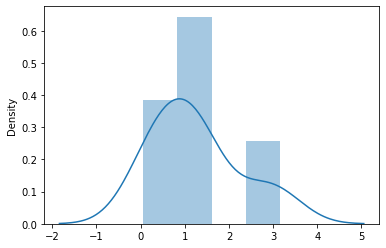

In [18]:
sns.distplot(data)

In [9]:
import numpy as np
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create a synthetic dataset
X = np.random.normal(loc=100, scale=10, size=(1000, 5))
y = np.random.normal(loc=100, scale=10, size=1000)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Fit and transform the data using Box-Cox method
boxcox_transformer = PowerTransformer(method='box-cox', standardize=True)
X_train_bc = boxcox_transformer.fit_transform(X_train)
X_test_bc = boxcox_transformer.transform(X_test)

# Fit and transform the data using Yeo-Johnson method
yeojohnson_transformer = PowerTransformer(method='yeo-johnson', standardize=True)
X_train_yj = yeojohnson_transformer.fit_transform(X_train)
X_test_yj = yeojohnson_transformer.transform(X_test)



In [11]:
# Train a linear regression model using Box-Cox transformed data
model_bc = LinearRegression()
model_bc.fit(X_train_bc, y_train)

# Train a linear regression model using Yeo-Johnson transformed data
model_yj = LinearRegression()
model_yj.fit(X_train_yj, y_train)

LinearRegression()

In [12]:
# Evaluate the models on the testing data
score_bc = model_bc.score(X_test_bc, y_test)
score_yj = model_yj.score(X_test_yj, y_test)

print(f"Box-Cox method score: {score_bc:.3f}")
print(f"Yeo-Johnson method score: {score_yj:.3f}")


Box-Cox method score: -0.026
Yeo-Johnson method score: -0.026


Box-Cox method score: 0.019
Yeo-Johnson method score: 0.016


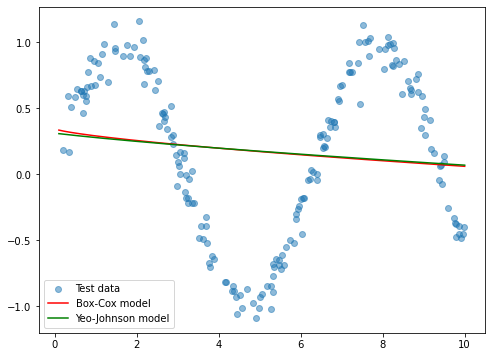

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create a synthetic dataset with non-linear relationship
X = np.linspace(0.1, 10, 1000).reshape(-1, 1)
y = np.sin(X) + np.random.normal(scale=0.1, size=(1000, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the data using Box-Cox method
boxcox_transformer = PowerTransformer(method='box-cox', standardize=True)
X_train_bc = boxcox_transformer.fit_transform(X_train)
X_test_bc = boxcox_transformer.transform(X_test)

# Fit and transform the data using Yeo-Johnson method
yeojohnson_transformer = PowerTransformer(method='yeo-johnson', standardize=True)
X_train_yj = yeojohnson_transformer.fit_transform(X_train)
X_test_yj = yeojohnson_transformer.transform(X_test)

# Train a linear regression model using Box-Cox transformed data
model_bc = LinearRegression()
model_bc.fit(X_train_bc, y_train)

# Train a linear regression model using Yeo-Johnson transformed data
model_yj = LinearRegression()
model_yj.fit(X_train_yj, y_train)

# Evaluate the models on the testing data
score_bc = model_bc.score(X_test_bc, y_test)
score_yj = model_yj.score(X_test_yj, y_test)

print(f"Box-Cox method score: {score_bc:.3f}")
print(f"Yeo-Johnson method score: {score_yj:.3f}")

# Plot the data and the models
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_test, y_test, alpha=0.5, label='Test data')

# Plot the Box-Cox model
x_bc = boxcox_transformer.transform(X)
y_bc_pred = model_bc.predict(x_bc)
ax.plot(X, y_bc_pred, 'r-', label='Box-Cox model')

# Plot the Yeo-Johnson model
x_yj = yeojohnson_transformer.transform(X)
y_yj_pred = model_yj.predict(x_yj)
ax.plot(X, y_yj_pred, 'g-', label='Yeo-Johnson model')

ax.legend()
plt.show()
